In [5]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.model_selection import train_test_split
from torchvision.datasets.folder import default_loader
from tqdm import tqdm

In [12]:
# Caminho do dataset
DATASET_DIR = './vin_characters_crops_merged-dataset2'

# Transformações
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),  # necessário se for usar modelo pré-treinado
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset completo
full_dataset = ImageFolder(root=DATASET_DIR, transform=transform)

# Separar treino e validação
train_idx, val_idx = train_test_split(list(range(len(full_dataset))), test_size=0.2, stratify=full_dataset.targets)

train_dataset = torch.utils.data.Subset(full_dataset, train_idx)
val_dataset = torch.utils.data.Subset(full_dataset, val_idx)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

print(f"Número de classes: {len(full_dataset.classes)}")
print(f"Classes: {full_dataset.classes}")


Número de classes: 33
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [7]:
import torch.nn as nn
# Carregando o modelo RESNET18 salvo 
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # Ajustar a camada final para o número de classes
# Carregar pesos do modelo salvo
model.load_state_dict(torch.load('vin_char_classifier+augmentation_2.pth', map_location=torch.device('cpu')))

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [9]:
import torch
torch.cuda.is_available()

True

In [8]:
import torch
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(full_dataset.classes))
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 10

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"[Epoch {epoch+1}] Loss: {train_loss / len(train_loader):.4f}")

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/10: 100%|██████████| 475/475 [05:56<00:00,  1.33it/s]


[Epoch 1] Loss: 1.0337


Epoch 2/10: 100%|██████████| 475/475 [05:17<00:00,  1.50it/s]


[Epoch 2] Loss: 0.3048


Epoch 3/10: 100%|██████████| 475/475 [05:03<00:00,  1.56it/s]


[Epoch 3] Loss: 0.1606


Epoch 4/10: 100%|██████████| 475/475 [04:59<00:00,  1.58it/s]


[Epoch 4] Loss: 0.0902


Epoch 5/10: 100%|██████████| 475/475 [05:03<00:00,  1.56it/s]


[Epoch 5] Loss: 0.0601


Epoch 6/10: 100%|██████████| 475/475 [04:59<00:00,  1.59it/s]


[Epoch 6] Loss: 0.0508


Epoch 7/10: 100%|██████████| 475/475 [04:59<00:00,  1.59it/s]


[Epoch 7] Loss: 0.0550


Epoch 8/10: 100%|██████████| 475/475 [05:18<00:00,  1.49it/s]


[Epoch 8] Loss: 0.0351


Epoch 9/10: 100%|██████████| 475/475 [05:26<00:00,  1.45it/s]


[Epoch 9] Loss: 0.0250


Epoch 10/10: 100%|██████████| 475/475 [05:18<00:00,  1.49it/s]

[Epoch 10] Loss: 0.0526


In [8]:
from sklearn.metrics import precision_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ensure model is on the correct device
model.to(device)
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

precision = precision_score(all_labels, all_preds, average='macro')
print(f"🔍 Precisão (macro) na validação: {precision:.4f}")

torch.save(model.state_dict(), 'vin_char_classifier+augmentation_2.pth')

🔍 Precisão (macro) na validação: 0.9777


In [11]:
# Teste com uma imagem específica
test_image_path = './vin_characters_crops_merged-dataset2/0/Tugas-Akhir-2_D-4160-UAG-nomor-rangka_jpg.rf.3c52ba8ec7033c455da93a4cdaaa2728_5.jpg'
def predict_image(image_path, model, transform):
    model.eval()
    image = default_loader(image_path)
    image = transform(image).unsqueeze(0)  # Adicionar dimensão de batch
    image = image.to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    
    return predicted.item()
predicted_class = predict_image(test_image_path, model, transform)
print(f"Imagem testada: {test_image_path}")
print(f"A classe prevista para a imagem é: {full_dataset.classes[predicted_class]}")

Imagem testada: ./vin_characters_crops_merged-dataset2/0/Tugas-Akhir-2_D-4160-UAG-nomor-rangka_jpg.rf.3c52ba8ec7033c455da93a4cdaaa2728_5.jpg
A classe prevista para a imagem é: 0


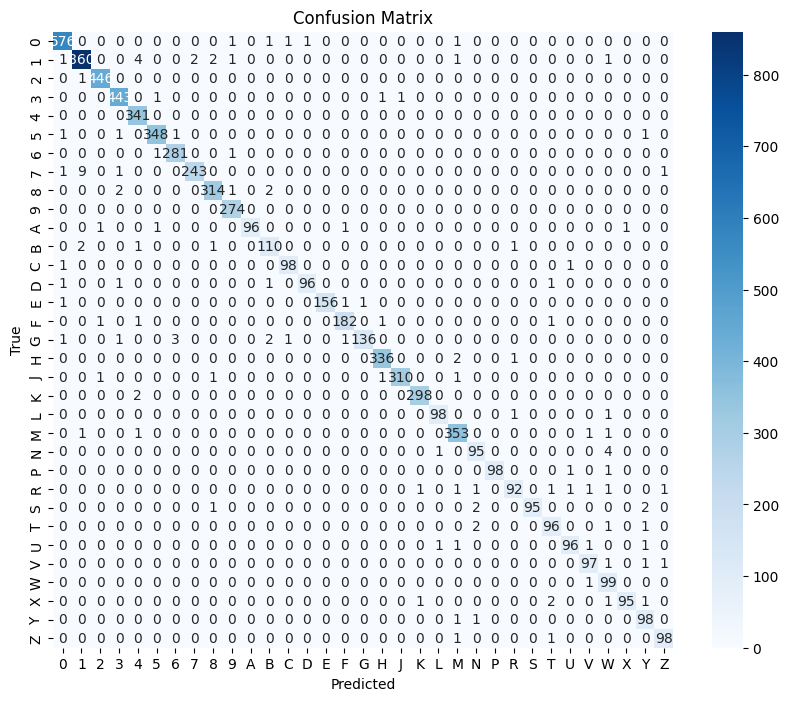

In [12]:
# Gerando a matriz de confusão
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
# Plotando a matriz de confusão
plot_confusion_matrix(all_labels, all_preds, full_dataset.classes)

# DETECÇÃO DE DESBALANCEAMENTOS

In [ ]:
import os
from collections import Counter

def count_images_per_class(base_dir):
    counter = Counter()
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            counter[class_name] = len(images)
    return counter

# Exemplo: caminho para os crops de caracteres
counts = count_images_per_class("vin_characters_crops_merged-dataset2")
print(counts)

Counter({'1': 4358, '0': 2904, '2': 2235, '3': 2228, 'M': 1786, '5': 1762, '4': 1707, 'H': 1694, '8': 1593, 'J': 1568, 'K': 1499, '6': 1418, '9': 1370, '7': 1275, 'F': 929, 'E': 797, 'G': 725, 'B': 575, 'A': 500, 'C': 500, 'D': 500, 'I': 500, 'L': 500, 'N': 500, 'P': 500, 'R': 500, 'S': 500, 'T': 500, 'U': 500, 'V': 500, 'W': 500, 'X': 500, 'Y': 500, 'Z': 500})


In [ ]:
import os
import cv2
import albumentations as A
from collections import defaultdict
from tqdm import tqdm

# Aumentar até este número de imagens por classe
TARGET_COUNT = 1000

# Diretório da base de dados
DATASET_DIR = "vin_characters_crops_merged-dataset2/"

# Augmentations para VIN OCR
augment = A.Compose([
    A.Rotate(limit=5, p=0.7),
    A.RandomBrightnessContrast(p=0.7),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
    A.Perspective(scale=(0.02, 0.05), p=0.5),
    A.MotionBlur(p=0.3)
])

def augment_class(class_dir, current_count):
    files = [f for f in os.listdir(class_dir) if f.endswith(".jpg")]
    needed = TARGET_COUNT - current_count
    print(f"Classe '{os.path.basename(class_dir)}' precisa de {needed} imagens")

    for i in tqdm(range(needed), desc=f"Augmentando classe {os.path.basename(class_dir)}"):
        img_name = files[i % len(files)]
        img_path = os.path.join(class_dir, img_name)
        image = cv2.imread(img_path)

        if image is None:
            continue

        aug_image = augment(image=image)['image']
        out_name = f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg"
        out_path = os.path.join(class_dir, out_name)
        cv2.imwrite(out_path, aug_image)

def main():
    for class_id in os.listdir(DATASET_DIR):
        class_path = os.path.join(DATASET_DIR, class_id)
        if not os.path.isdir(class_path):
            continue
        images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
        count = len(images)
        if count < TARGET_COUNT:
            augment_class(class_path, count)

if __name__ == "__main__":
    main()

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- CONFIGURAÇÕES ---
MODEL_PATH = "vin_char_classifier+augmentation_2.pth"  # seu modelo salvo
DATASET_PATH = "./vin_characters_crops_merged-dataset2/test"  # pasta de teste
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- TRANSFORMAÇÕES ---
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- DATASET E DATALOADER ---
test_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# --- MODELO ---
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.to(DEVICE)
model.eval()

# --- AVALIAÇÃO ---
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# --- MÉTRICAS ---
print("\n=== RELATÓRIO DE CLASSIFICAÇÃO ===")
print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))

# --- MATRIZ DE CONFUSÃO ---
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusão - ResNet18 (Classificação de Caracteres VIN)")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

# --- MÉTRICAS AGREGADAS ---
acc = np.mean(np.array(all_labels) == np.array(all_preds))
print(f"\nAcurácia geral: {acc * 100:.2f}%")
